In [147]:
import pandas as pd
from random import random
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon

In [179]:
# There is an extra row since the top and bottom ones are half rows
cols = 7
rows = 17

# Quilt dimensions in inches
w = 55
h = 74 * (rows + 1) / rows

In [180]:
# Stored color palettes

# Trying to match the original Entangled Sky design
original_colors = [
    [1, 1, 1, 1, 1, 1, 1],  # 0
    [2, 1, 1, 1, 1, 1, 1],  # 1
    [2, 1, 1, 1, 1, 1, 1],  # 2
    [2, 2, 2, 1, 1, 1, 1],  # 3
    [2, 2, 1, 1, 1, 1, 1],  # 4
    [2, 2, 2, 1, 1, 1, 1],  # 5
    [2, 2, 2, 1, 1, 1, 1],  # 5
    [3, 2, 2, 1, 1, 2, 2],  # 6
    [3, 3, 2, 2, 1, 1, 2],  # 7
    [3, 2, 2, 2, 1, 2, 2],  # 8
    [3, 3, 2, 2, 2, 2, 2],  # 9
    [3, 3, 2, 2, 2, 2, 2],  # 10
    [3, 3, 2, 2, 2, 2, 2],  # 11
    [3, 3, 2, 2, 2, 2, 2],  # 12
    [3, 3, 3, 3, 3, 2, 2],  # 13
    [3, 3, 3, 3, 3, 3, 3],  # 14
    [3, 3, 3, 3, 3, 3, 3],  # 15
    [3, 3, 3, 3, 3, 3, 3],  # 15
    [3, 3, 3, 3, 3, 3, 3],  # 16
]
original_color_map = {
    1: "green",
    2: "#002D62",
    3: "#702963",
}

<Figure size 792x1128.28 with 0 Axes>

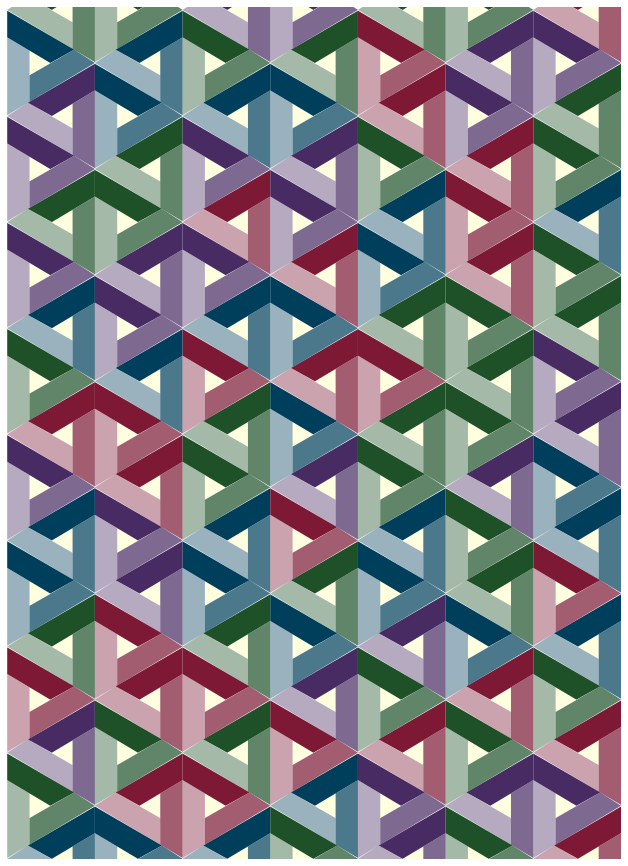

In [207]:
# Initialize the plot
plt.clf()
plt.rcParams["figure.figsize"] = (w / 5, h / 5)
fig, ax = plt.subplots()
plt.xlim([0 - 2 * w / (3 * cols), w - 2 * w / (3 * cols)])
plt.ylim([0, int(h * rows / (rows + 1))])

zig_zag_colors = [
    [1, 1, 4, 4, 1, 1, 4],  # 0
    [1, 1, 1, 1, 1, 1, 1],  # 1
    [2, 2, 1, 1, 2, 2, 1],  # 2
    [2, 2, 2, 2, 2, 2, 2],  # 3
    [3, 3, 2, 2, 3, 3, 2],  # 4
    [3, 3, 3, 3, 3, 3, 3],  # 5
    [4, 4, 3, 3, 4, 4, 3],  # 5
    [4, 4, 4, 4, 4, 4, 4],  # 6
    [1, 1, 4, 4, 1, 1, 4],  # 0
    [1, 1, 1, 1, 1, 1, 1],  # 1
    [2, 2, 1, 1, 2, 2, 1],  # 2
    [2, 2, 2, 2, 2, 2, 2],  # 3
    [3, 3, 2, 2, 3, 3, 2],  # 4
    [3, 3, 3, 3, 3, 3, 3],  # 5
    [4, 4, 3, 3, 4, 4, 3],  # 5
    [4, 4, 4, 4, 4, 4, 4],  # 6
    [1, 1, 4, 4, 1, 1, 4],  # 0
    [1, 1, 1, 1, 1, 1, 1],  # 1
    [2, 2, 1, 1, 2, 2, 1],  # 2
]
zig_zag_color_map = {1: "#003F5C", 2: "#472B62", 3: "#7D1935", 4: "#1E5128"}

# Returns the background color first and then the three colors for the triangle
def get_colors(r, c):
    #color = zig_zag_color_map[zig_zag_colors[r][c]]
    color = zig_zag_color_map[int(random()*4) + 1]

    bg_color = None
    if r < rows / 3:
        bg_color = "lightgray"
    elif r < rows * 2 / 3:
        bg_color = "darkgray"
    else:
        bg_color = "gray"
    return ("lightyellow", color)


def draw_triangle(r, c):
    y = r * (h / rows)
    x = c * (w / cols)

    # The thickness of the strips without margins
    a = 2
    # The height of the triangle
    b = w / cols

    (bg, fg) = get_colors(r, c)

    if (r + c) % 2 == 0:
        # Pointing left
        # Center triangle
        ax.add_patch(
            Polygon(
                [
                    (x - 2 * b / 3 + 2 * a, y),
                    (x + b / 3 - a, y + (b - 4 - a) / sqrt(3)),
                    (x + b / 3 - a, y - (b - 4 - a) / sqrt(3)),
                ],
                color=bg,
                ec=None,
            )
        )
        # Dark
        ax.add_patch(
            Polygon(
                [
                    (x - b / sqrt(3) + a / sqrt(3), y + a / sqrt(3)),
                    (x - 2 * b / 3 + 2 * a, y),
                    (x + b / 3, y + (b - 4) / sqrt(3)),
                    (x + b / 3, y + b / sqrt(3)),
                ],
                color=fg,
                alpha=1,
                ec=None,
            )
        )
        # Medium
        ax.add_patch(
            Polygon(
                [
                    (x + b / 3, y + (b - 4) / sqrt(3)),
                    (x + b / 3 - a, y + (b - 4 - a) / sqrt(3)),
                    (x + b / 3 - a, y - b / sqrt(3) + a / sqrt(3)),
                    (x + b / 3, y - b / sqrt(3)),
                ],
                color=fg,
                alpha=0.7,
                ec=None,
            )
        )
        # Light
        ax.add_patch(
            Polygon(
                [
                    (x + b / 3 - a, y - b / sqrt(3) + a / sqrt(3)),
                    (x + b / 3 - a, y - (b - 4 - a) / sqrt(3)),
                    (x - b / sqrt(3) + a / sqrt(3), y + a / sqrt(3)),
                    (x - 2 * b / 3, y),
                ],
                color=fg,
                alpha=0.4,
                ec=None,
            )
        )
    else:
        # Pointing right
        # Center triangle
        ax.add_patch(
            Polygon(
                [
                    (x + b / 3 - 2 * a, y),
                    (x - 2 * b / 3 + a, y - (b - 4 - a) / sqrt(3)),
                    (x - 2 * b / 3 + a, y + (b - 4 - a) / sqrt(3)),
                ],
                color=bg,
                ec=None,
            )
        )
        # Dark
        ax.add_patch(
            Polygon(
                [
                    (x + b / sqrt(3) - b / 3 - a / sqrt(3), y + a / sqrt(3)),
                    (x + b / 3 - 2 * a, y),
                    (x - 2 * b / 3, y + (b - 4) / sqrt(3)),
                    (x - 2 * b / 3, y + b / sqrt(3)),
                ],
                color=fg,
                alpha=1,
                ec=None,
            )
        )
        # Medium
        ax.add_patch(
            Polygon(
                [
                    (x - 2 * b / 3 + a, y - b / sqrt(3) + a / sqrt(3)),
                    (x - 2 * b / 3 + a, y - (b - 4 - a) / sqrt(3)),
                    (x + b / sqrt(3) - b / 3 - a / sqrt(3), y + a / sqrt(3)),
                    (x + b / 3, y),
                ],
                color=fg,
                alpha=0.7,
                ec=None,
            )
        )
        # Light
        ax.add_patch(
            Polygon(
                [
                    (x - 2 * b / 3, y + (b - 4) / sqrt(3)),
                    (x - 2 * b / 3 + a, y + (b - 4 - a) / sqrt(3)),
                    (x - 2 * b / 3 + a, y - b / sqrt(3) + a / sqrt(3)),
                    (x - 2 * b / 3, y - b / sqrt(3)),
                ],
                color=fg,
                alpha=0.4,
                ec=None,
            )
        )


for i in range(0, rows):
    for j in range(0, cols):
        draw_triangle(i, j)

# Hide ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_yticks([])
ax.set_xticks([])

# Save image
plt.savefig("big_random.png", bbox_inches="tight", pad_inches=0.5)